# 维纳滤波

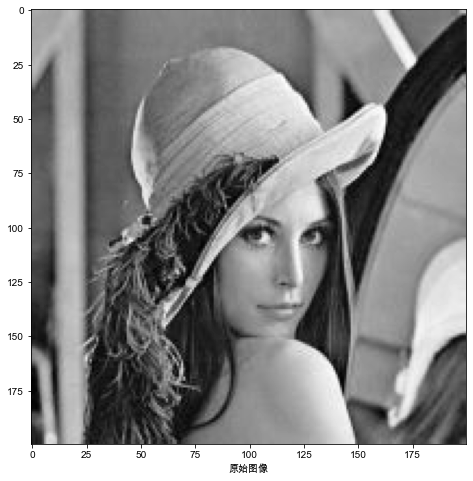

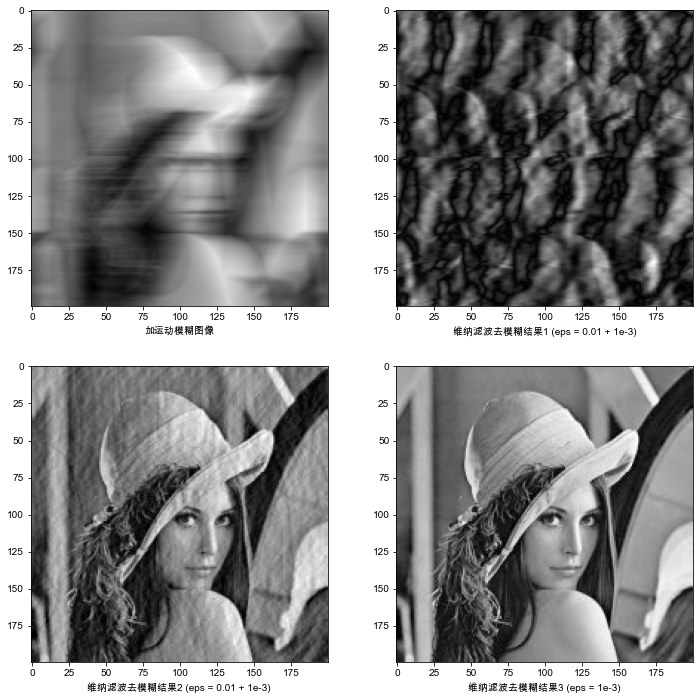

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/Arial Unicode.ttf")
plt.rcParams["font.family"] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

# 仿真运动模糊
def motion_process(len, size):
    sx, sy = size
    PSF = numpy.zeros((sy, sx))
    PSF[int(sy / 2):int(sy /2 + 1), int(sx / 2 - len / 2):int(sx / 2 + len / 2)] = 1
    return PSF / PSF.sum() # 归一化亮度

def make_blurred(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps
    blurred = numpy.fft.ifft2(input_fft * PSF_fft)
    blurred = numpy.abs(numpy.fft.fftshift(blurred))
    return blurred

def wiener(input, PSF, eps):
    input_fft = numpy.fft.fft2(input)
    PSF_fft = numpy.fft.fft2(PSF) + eps #噪声功率，这是已知的，考虑epsilon
    result = numpy.fft.ifft2(input_fft / PSF_fft) #计算F(u,v)的傅里叶反变换
    result = numpy.abs(numpy.fft.fftshift(result))
    return result

image = Image.open('img/lena.jpg').convert('L')
plt.figure(figsize=(8, 8))
plt.xlabel("原始图像")
plt.gray()
plt.imshow(image)

plt.figure(figsize=(12, 12))
plt.gray()
data = numpy.asarray(image.getdata()).reshape(image.size)
PSF = motion_process(30, data.shape)
blurred = numpy.abs(make_blurred(data, PSF, 1e-3))

plt.subplot(221)
plt.xlabel("加运动模糊图像")
plt.imshow(blurred)

result = wiener(blurred, PSF, 0.1 + 1e-3)
plt.subplot(222)
plt.xlabel("维纳滤波去模糊结果1 (eps = 0.01 + 1e-3)")
plt.imshow(result)

result = wiener(blurred, PSF, 0.01 + 1e-3)
plt.subplot(223)
plt.xlabel("维纳滤波去模糊结果2 (eps = 0.01 + 1e-3)")
plt.imshow(result)

result = wiener(blurred, PSF, 1e-3)
plt.subplot(224)
plt.xlabel("维纳滤波去模糊结果3 (eps = 1e-3)")
plt.imshow(result)



plt.show()
